<a href="https://colab.research.google.com/github/GNuSeekK/ICTCOG/blob/main/2_21_%5BData_Analyze%5D_%EB%B2%94%EC%A3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 카카오 개발자 API ( Kakao Developer API 사용하기 )

In [3]:
pop_cctv_filepath = "/content/drive/MyDrive/ICTCOG 인공지능과정/Data/pop_cctv_result.csv"
crime_in_seoul = "/content/drive/MyDrive/ICTCOG 인공지능과정/Data/crime_in_Seoul.csv"

In [4]:
import pandas as pd
import numpy as np

In [5]:
# crime_in_seoul csv 파일은 천의 자리마다 "," 가 붙어있음! 얘를 제거하면서 숫자데이터 형식으로 받아 와야 합니다.
# 왜냐면 1,234 -> 숫자가 아닌 문자열로 처리되기 때문

df_crime_police = pd.read_csv(crime_in_seoul, thousands=",", encoding='euc-kr')
df_crime_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [6]:
df_crime_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


서울 시의 구가 25개 구가 있는데, 경찰서는 31개..

---

실제 어떤 구에 어떤 경찰서가 있는지를 파악 - 카카오 검색 엔진을 사용해서 경찰서의 주소를 검색

* 카카오의 검색 엔진은 다음에서 검색한 것과 똑같다.
* 예를 들어 무슨 구에 있는지를 알아내기 위해 **"혜화서"**로 검색을 했더니 시장, 경찰서 등등 필요 없는 정보가 검색이 된다.
* 정확하게 검색하기 위해서 **서울혜화경찰서**로 검색을 했더니 제대로 결과가 나온다.

In [7]:
# 강의에 나온 방식
station_name = []

for name in df_crime_police['관서명']:
  new_station = f"서울{name[:-1]}경찰서"
  station_name.append(new_station)

print(station_name)

# 내 방식
station_name = [f'서울{x[:-1]}경찰서' for x in df_crime_police['관서명']]
print(station_name)

['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서', '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서', '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서', '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서', '서울수서경찰서']
['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서', '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서', '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서', '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서', '서울수서경찰서']


In [8]:
test_query = "서울광진경찰서"

# API 사용하기

In [9]:
path = r'/content/drive/MyDrive/ICTCOG 인공지능과정/Data/KAKAO API KEY'
f = open(path)
KAKAO_API_KEY=f.read() # private 초대장의 역할. 얘가 있어야지만 카카오 서버에 요청이 가능!
f.close()

In [10]:
# KAKAO_API_URL = "https://dapi.kakao.com/v2/local/search/keyword.{format}" # format : xml로 받을지, json으로 받을지 설정
KAKAO_API_URL = "https://dapi.kakao.com/v2/local/search/keyword.json"

## API를 사용하기 위한 패키지

In [11]:
# 요청을 위한 패키지
import urllib.request

# 응답 받은 내용을 json 형식으로 바꿔주기 위한 패키지
import json

# requests 도 이용해 보자!!(개인 실습)
import requests

## 요청 전 신경써야 할 것들

In [12]:
# 검색어 설정 - 검색어를 term 또는 query라는 표현을 많이 한다.
# 한글 데이터 같은 경우에는 한국 서비스에 검색하는 것은 문제가 많이 안되는데,
# 외국 서비스에 검색 같은 것들을 하게 되면 오류가 생기는 경우가 있습니다.
# 한글 데이터 검색을 하기 위해서 utf-8 형식으로 인코딩 작업을 진행

# 문자열을 내가 원하는 형식 또는 자료형으로 바꾸는 것을 인코딩이라고 한다.

enc_text = urllib.parse.quote(test_query)
enc_text

'%EC%84%9C%EC%9A%B8%EA%B4%91%EC%A7%84%EA%B2%BD%EC%B0%B0%EC%84%9C'

# 요청(Request)하기

In [13]:
# 요청 정보 만들기
request = urllib.request.Request(
    KAKAO_API_URL+"?query={}".format(enc_text)
)

In [14]:
# request에 API_KEY 등록
request.add_header(
    "Authorization","KakaoAK {}".format(KAKAO_API_KEY)
)

In [15]:
# 실제 요청하고 응답 받기
response = urllib.request.urlopen(request)

# 실제 응답된 내용에서 받아야 할 데이터만 가지고 오기
# 실제 데이터가 들어있는 부분을 body라고 합니다.
response_body = response.read() # read : 응답(Response)에서 데이터 가져오기
response_body

b'{"documents":[{"address_name":"\xec\x84\x9c\xec\x9a\xb8 \xea\xb4\x91\xec\xa7\x84\xea\xb5\xac \xea\xb5\xac\xec\x9d\x98\xeb\x8f\x99 254-32","category_group_code":"PO3","category_group_name":"\xea\xb3\xb5\xea\xb3\xb5\xea\xb8\xb0\xea\xb4\x80","category_name":"\xec\x82\xac\xed\x9a\x8c,\xea\xb3\xb5\xea\xb3\xb5\xea\xb8\xb0\xea\xb4\x80 \\u003e \xed\x96\x89\xec\xa0\x95\xea\xb8\xb0\xea\xb4\x80 \\u003e \xea\xb2\xbd\xec\xb0\xb0\xec\x84\x9c","distance":"","id":"8211607","phone":"02-2285-7602","place_name":"\xec\x84\x9c\xec\x9a\xb8\xea\xb4\x91\xec\xa7\x84\xea\xb2\xbd\xec\xb0\xb0\xec\x84\x9c","place_url":"http://place.map.kakao.com/8211607","road_address_name":"\xec\x84\x9c\xec\x9a\xb8 \xea\xb4\x91\xec\xa7\x84\xea\xb5\xac \xec\x9e\x90\xec\x96\x91\xeb\xa1\x9c 167","x":"127.08396170505674","y":"37.54292164557882"},{"address_name":"\xec\x84\x9c\xec\x9a\xb8 \xea\xb4\x91\xec\xa7\x84\xea\xb5\xac \xea\xb5\xac\xec\x9d\x98\xeb\x8f\x99 254-32","category_group_code":"","category_group_name":"","category_name"

응답받은 데이터를 정확하게 json 형식으로 바꿔주는 라이브러리가 있습니다.

In [16]:
json_dict = json.loads(response_body.decode("utf-8"))
json_dict

{'documents': [{'address_name': '서울 광진구 구의동 254-32',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 행정기관 > 경찰서',
   'distance': '',
   'id': '8211607',
   'phone': '02-2285-7602',
   'place_name': '서울광진경찰서',
   'place_url': 'http://place.map.kakao.com/8211607',
   'road_address_name': '서울 광진구 자양로 167',
   'x': '127.08396170505674',
   'y': '37.54292164557882'},
  {'address_name': '서울 광진구 구의동 254-32',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 행정기관부속시설',
   'distance': '',
   'id': '10148871',
   'phone': '182',
   'place_name': '서울광진경찰서 종합민원실',
   'place_url': 'http://place.map.kakao.com/10148871',
   'road_address_name': '서울 광진구 자양로 167',
   'x': '127.08390061183125',
   'y': '37.542930698994724'},
  {'address_name': '서울 광진구 구의동 254-32',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 행정기관부속시설',
   'distance': '',
   'id': '1348410921',
   'phon

**개인 실습**

In [17]:
# requests 모듈을 이용하는 방법 (개인실습)
host = 'https://dapi.kakao.com'
path = '/v2/local/search/keyword.json'
params = {'query' : '서울광진경찰서'}
headers = {'Authorization' : f'KakaoAK {KAKAO_API_KEY}'}
url = host + path
response = requests.get(url, params = params, headers = headers )
response.json()

{'documents': [{'address_name': '서울 광진구 구의동 254-32',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 행정기관 > 경찰서',
   'distance': '',
   'id': '8211607',
   'phone': '02-2285-7602',
   'place_name': '서울광진경찰서',
   'place_url': 'http://place.map.kakao.com/8211607',
   'road_address_name': '서울 광진구 자양로 167',
   'x': '127.08396170505674',
   'y': '37.54292164557882'},
  {'address_name': '서울 광진구 구의동 254-32',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 행정기관부속시설',
   'distance': '',
   'id': '10148871',
   'phone': '182',
   'place_name': '서울광진경찰서 종합민원실',
   'place_url': 'http://place.map.kakao.com/10148871',
   'road_address_name': '서울 광진구 자양로 167',
   'x': '127.08390061183125',
   'y': '37.542930698994724'},
  {'address_name': '서울 광진구 구의동 254-32',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '사회,공공기관 > 행정기관부속시설',
   'distance': '',
   'id': '1348410921',
   'phon

In [18]:
documents = json_dict['documents']
documents

[{'address_name': '서울 광진구 구의동 254-32',
  'category_group_code': 'PO3',
  'category_group_name': '공공기관',
  'category_name': '사회,공공기관 > 행정기관 > 경찰서',
  'distance': '',
  'id': '8211607',
  'phone': '02-2285-7602',
  'place_name': '서울광진경찰서',
  'place_url': 'http://place.map.kakao.com/8211607',
  'road_address_name': '서울 광진구 자양로 167',
  'x': '127.08396170505674',
  'y': '37.54292164557882'},
 {'address_name': '서울 광진구 구의동 254-32',
  'category_group_code': '',
  'category_group_name': '',
  'category_name': '사회,공공기관 > 행정기관부속시설',
  'distance': '',
  'id': '10148871',
  'phone': '182',
  'place_name': '서울광진경찰서 종합민원실',
  'place_url': 'http://place.map.kakao.com/10148871',
  'road_address_name': '서울 광진구 자양로 167',
  'x': '127.08390061183125',
  'y': '37.542930698994724'},
 {'address_name': '서울 광진구 구의동 254-32',
  'category_group_code': '',
  'category_group_name': '',
  'category_name': '사회,공공기관 > 행정기관부속시설',
  'distance': '',
  'id': '1348410921',
  'phone': '02-2285-7365',
  'place_name': '광진경찰서 수

In [19]:
documents[0]

{'address_name': '서울 광진구 구의동 254-32',
 'category_group_code': 'PO3',
 'category_group_name': '공공기관',
 'category_name': '사회,공공기관 > 행정기관 > 경찰서',
 'distance': '',
 'id': '8211607',
 'phone': '02-2285-7602',
 'place_name': '서울광진경찰서',
 'place_url': 'http://place.map.kakao.com/8211607',
 'road_address_name': '서울 광진구 자양로 167',
 'x': '127.08396170505674',
 'y': '37.54292164557882'}

In [20]:
documents[0]['address_name']

'서울 광진구 구의동 254-32'

전체 데이터에서 가지고 올 수 있도록 코딩

In [21]:
# 경찰서들의 주소를 담아낼 리스트
station_address = []

for name in station_name:
  # 1. 검색이 인코딩
  enc_text = urllib.parse.quote(name)

  # 2. 요청 정보 설정
  request = urllib.request.Request( KAKAO_API_URL+"?query={}".format(enc_text) )
  request.add_header( "Authorization","KakaoAK {}".format(KAKAO_API_KEY) )

  # 3. 요청 후 응답 받기
  response = urllib.request.urlopen(request)
  
  # 4. 응답 받은 데이터로 부터 주소만 추출하기
  response_code = response.getcode() # 응답 성공 여부, 실패 여부 받아내기

  # response_code에 200번 코드가 들어오면 성공!
  if response_code == 200:
    response_body = response.read()
    response_json = json.loads(response_body.decode('utf-8'))
    
    documents = response_json['documents']
    data = documents[0]
    address = data['address_name']

    print("{} ====> {}".format(name, address))

    station_address.append(address)

station_address

서울중부경찰서 ====> 서울 중구 저동2가 62-1
서울종로경찰서 ====> 서울 종로구 경운동 90-18
서울남대문경찰서 ====> 서울 중구 남대문로5가 567
서울서대문경찰서 ====> 서울 서대문구 미근동 165
서울혜화경찰서 ====> 서울 종로구 인의동 48-57
서울용산경찰서 ====> 서울 용산구 원효로1가 12-12
서울성북경찰서 ====> 서울 성북구 삼선동5가 301
서울동대문경찰서 ====> 서울 동대문구 청량리동 229
서울마포경찰서 ====> 서울 마포구 아현동 618-1
서울영등포경찰서 ====> 서울 영등포구 당산동3가 2-11
서울성동경찰서 ====> 서울 성동구 행당동 192-8
서울동작경찰서 ====> 서울 동작구 노량진동 72-35
서울광진경찰서 ====> 서울 광진구 구의동 254-32
서울서부경찰서 ====> 서울 은평구 녹번동 177-15
서울강북경찰서 ====> 서울 강북구 번동 415-15
서울금천경찰서 ====> 서울 금천구 시흥동 1030
서울중랑경찰서 ====> 서울 중랑구 신내동 810
서울강남경찰서 ====> 서울 강남구 대치동 998
서울관악경찰서 ====> 서울 관악구 봉천동 1695-5
서울강서경찰서 ====> 서울 강서구 화곡동 980-27
서울강동경찰서 ====> 서울 강동구 성내동 541-1
서울종암경찰서 ====> 서울 성북구 종암동 3-1260
서울구로경찰서 ====> 서울 구로구 구로동 436
서울서초경찰서 ====> 서울 서초구 서초동 1726-1
서울양천경찰서 ====> 서울 양천구 신정동 321
서울송파경찰서 ====> 서울 송파구 가락동 9
서울노원경찰서 ====> 서울 노원구 하계동 250
서울방배경찰서 ====> 서울 서초구 방배동 455-10
서울은평경찰서 ====> 서울 은평구 불광동 산 24
서울도봉경찰서 ====> 서울 도봉구 창동 17
서울수서경찰서 ====> 서울 강남구 개포동 14


['서울 중구 저동2가 62-1',
 '서울 종로구 경운동 90-18',
 '서울 중구 남대문로5가 567',
 '서울 서대문구 미근동 165',
 '서울 종로구 인의동 48-57',
 '서울 용산구 원효로1가 12-12',
 '서울 성북구 삼선동5가 301',
 '서울 동대문구 청량리동 229',
 '서울 마포구 아현동 618-1',
 '서울 영등포구 당산동3가 2-11',
 '서울 성동구 행당동 192-8',
 '서울 동작구 노량진동 72-35',
 '서울 광진구 구의동 254-32',
 '서울 은평구 녹번동 177-15',
 '서울 강북구 번동 415-15',
 '서울 금천구 시흥동 1030',
 '서울 중랑구 신내동 810',
 '서울 강남구 대치동 998',
 '서울 관악구 봉천동 1695-5',
 '서울 강서구 화곡동 980-27',
 '서울 강동구 성내동 541-1',
 '서울 성북구 종암동 3-1260',
 '서울 구로구 구로동 436',
 '서울 서초구 서초동 1726-1',
 '서울 양천구 신정동 321',
 '서울 송파구 가락동 9',
 '서울 노원구 하계동 250',
 '서울 서초구 방배동 455-10',
 '서울 은평구 불광동 산 24',
 '서울 도봉구 창동 17',
 '서울 강남구 개포동 14']

**개인 실습**

In [22]:
# 경찰서들의 주소를 담아낼 리스트
station_address = []

host = 'https://dapi.kakao.com'
path = '/v2/local/search/keyword.json'
url = host + path
headers = {'Authorization' : f'KakaoAK {KAKAO_API_KEY}'}
for name in station_name:
    # 1. parameter 설정
    params = {'query' : name}

    # 2. 요청 후 응답 받기
    response = requests.get(url, params = params, headers = headers)
  
    # 4. 응답 받은 데이터로 부터 주소만 추출하기
    response_code = response.status_code # 응답 성공 여부, 실패 여부 받아내기

    # response_code에 200번 코드가 들어오면 성공!
    if response_code == 200:
        response_json = response.json()

        documents = response_json['documents']
        data = documents[0]
        address = data['address_name']

        print("{} ====> {}".format(name, address))

        station_address.append(address)

station_address

서울중부경찰서 ====> 서울 중구 저동2가 62-1
서울종로경찰서 ====> 서울 종로구 경운동 90-18
서울남대문경찰서 ====> 서울 중구 남대문로5가 567
서울서대문경찰서 ====> 서울 서대문구 미근동 165
서울혜화경찰서 ====> 서울 종로구 인의동 48-57
서울용산경찰서 ====> 서울 용산구 원효로1가 12-12
서울성북경찰서 ====> 서울 성북구 삼선동5가 301
서울동대문경찰서 ====> 서울 동대문구 청량리동 229
서울마포경찰서 ====> 서울 마포구 아현동 618-1
서울영등포경찰서 ====> 서울 영등포구 당산동3가 2-11
서울성동경찰서 ====> 서울 성동구 행당동 192-8
서울동작경찰서 ====> 서울 동작구 노량진동 72-35
서울광진경찰서 ====> 서울 광진구 구의동 254-32
서울서부경찰서 ====> 서울 은평구 녹번동 177-15
서울강북경찰서 ====> 서울 강북구 번동 415-15
서울금천경찰서 ====> 서울 금천구 시흥동 1030
서울중랑경찰서 ====> 서울 중랑구 신내동 810
서울강남경찰서 ====> 서울 강남구 대치동 998
서울관악경찰서 ====> 서울 관악구 봉천동 1695-5
서울강서경찰서 ====> 서울 강서구 화곡동 980-27
서울강동경찰서 ====> 서울 강동구 성내동 541-1
서울종암경찰서 ====> 서울 성북구 종암동 3-1260
서울구로경찰서 ====> 서울 구로구 구로동 436
서울서초경찰서 ====> 서울 서초구 서초동 1726-1
서울양천경찰서 ====> 서울 양천구 신정동 321
서울송파경찰서 ====> 서울 송파구 가락동 9
서울노원경찰서 ====> 서울 노원구 하계동 250
서울방배경찰서 ====> 서울 서초구 방배동 455-10
서울은평경찰서 ====> 서울 은평구 불광동 산 24
서울도봉경찰서 ====> 서울 도봉구 창동 17
서울수서경찰서 ====> 서울 강남구 개포동 14


['서울 중구 저동2가 62-1',
 '서울 종로구 경운동 90-18',
 '서울 중구 남대문로5가 567',
 '서울 서대문구 미근동 165',
 '서울 종로구 인의동 48-57',
 '서울 용산구 원효로1가 12-12',
 '서울 성북구 삼선동5가 301',
 '서울 동대문구 청량리동 229',
 '서울 마포구 아현동 618-1',
 '서울 영등포구 당산동3가 2-11',
 '서울 성동구 행당동 192-8',
 '서울 동작구 노량진동 72-35',
 '서울 광진구 구의동 254-32',
 '서울 은평구 녹번동 177-15',
 '서울 강북구 번동 415-15',
 '서울 금천구 시흥동 1030',
 '서울 중랑구 신내동 810',
 '서울 강남구 대치동 998',
 '서울 관악구 봉천동 1695-5',
 '서울 강서구 화곡동 980-27',
 '서울 강동구 성내동 541-1',
 '서울 성북구 종암동 3-1260',
 '서울 구로구 구로동 436',
 '서울 서초구 서초동 1726-1',
 '서울 양천구 신정동 321',
 '서울 송파구 가락동 9',
 '서울 노원구 하계동 250',
 '서울 서초구 방배동 455-10',
 '서울 은평구 불광동 산 24',
 '서울 도봉구 창동 17',
 '서울 강남구 개포동 14']

In [23]:
gu_name = []

for name in station_address:
  tmp = name.split()
  gu_name.append(tmp[1])

# 내 방식

gu_name = [x.split()[1] for x in station_address]
gu_name

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '금천구',
 '중랑구',
 '강남구',
 '관악구',
 '강서구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [24]:
len(gu_name)

31

# 데이터 편집

In [25]:
df_crime_police['구별'] = gu_name
df_crime_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


## 구별 범죄 발생 및 검거 건수 합치기

In [26]:
crime = pd.pivot_table(
    df_crime_police,
    index="구별",
    aggfunc=np.sum
)

In [27]:
crime.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


* 지금은 검거 / 발생을 따로 봐야 하는 경우이다.
* 우리 동네가 안전하다 라고 느끼려면
  * 범죄가 발생이 되더라도 검거를 잘 하면 그나마 안전하다고 느낄 수 있을 것 같다.
* 범죄가 일어 났을 대 얼마나 잘 검거했냐 라는 데이터를 **새롭게 생성**
* 범죄 발생 데이터와 범죄 검거 데이터를 **조합** : 특성 조합

In [28]:
# 검거율 : 검거 / 발생 * 100
crime["강간검거율"] = crime["강간 검거"] / crime["강간 발생"] * 100
crime["강도검거율"] = crime["강도 검거"] / crime["강도 발생"] * 100
crime["살인검거율"] = crime["살인 검거"] / crime["살인 발생"] * 100
crime["절도검거율"] = crime["절도 검거"] / crime["절도 발생"] * 100
crime["폭력검거율"] = crime["폭력 검거"] / crime["폭력 발생"] * 100

crime.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [29]:
del crime['강간 검거']
del crime['강도 검거']
del crime['살인 검거']
del crime['절도 검거']
del crime['폭력 검거']

crime.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [30]:
# 컬럼의 이름을 바꾸기 위해서는 rename 함수
crime = crime.rename(
    columns={
        "강간 발생": "강간",
        "강도 발생": "강도",
        "살인 발생": "살인",
        "절도 발생": "절도",
        "폭력 발생": "폭력"
    }
)

crime.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


## 검거율 중에 100이 넘어가는 데이터는 100으로 통일

In [31]:
con_list = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]

for column in con_list:
  # 검거율이 100이 넘는 컬럼의 검거율 값은 100으로 통일
  crime.loc[crime[column] > 100, column] = 100

crime.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


# 정규화( normalization )
* 데이터들의 단위(스케일)를 하나로 정의해 놓는 것

In [32]:
# 파이썬의 대표적인 머신러닝 라이브러리인 sklearn의 MinMaxScaler를 사용
from sklearn.preprocessing import MinMaxScaler

col = ["강간", "강도", "살인", "절도", "폭력"]

# 정규화를 진행시킬 컬럼과, 데이터를 가져옵니다. values를 사용하면 컬럼과 행의 인덱스를 제외한 순수하게 데이터만 등장
x = crime[col].values

# 최고 높은 수치를 1로, 최고 낮은 수치를 0으로 만들어주는 MinMaxScaler 사용
minmax_scaler = MinMaxScaler()

# 정규화 수행, 정규화 시에는 모든 데이터가 정수가 아닌, 실수로 존재하는 것이 좋아요.
scaled_x = minmax_scaler.fit_transform(x)

# 정규화된 범죄 건수가 들어있는 새로운 데이터 프레임을 생성
crime_norm = pd.DataFrame(scaled_x, columns=col, index=crime.index)
crime_norm.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479


In [33]:
crime_norm[con_list] = crime[con_list]
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


# 인구수, CCTV 데이터와 합쳐보기

In [34]:
pop_cctv = pd.read_csv(pop_cctv_filepath, encoding='utf-8', index_col="구별")
pop_cctv.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,162.948104


In [35]:
crime_norm[['인구수', 'CCTV']] = pop_cctv[["인구수", "소계"]]
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


In [36]:
col = ["강간", "강도", "살인", "절도", "폭력"]
crime_norm["범죄"] = np.sum( crime_norm[col], axis=1 )
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342


In [37]:
col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_norm["검거율"] = np.sum(crime_norm[col], axis=1)
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


In [38]:
crime_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.204979,416.915211
구로구,0.515850,0.588235,0.500000,0.456405,0.543439,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.603930,325.647079
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.666924,423.928929
노원구,0.273775,0.117647,0.666667,0.405454,0.441902,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.905445,383.477292


# 시각화

In [39]:
import seaborn as sns

## pairplot 써보기
pairplot을 활용하여 범죄간의 상관관계를 확인


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


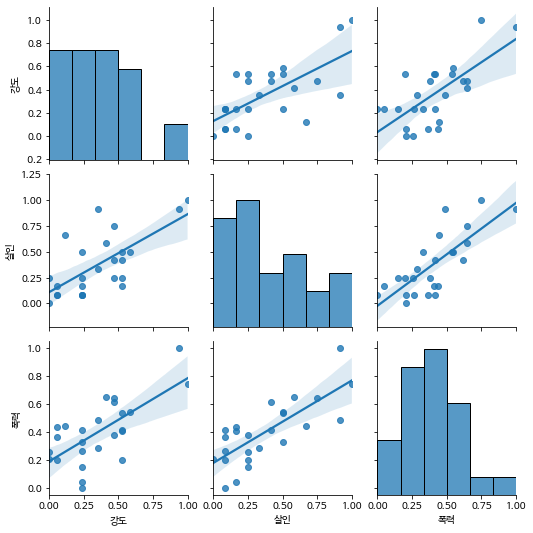

In [40]:
sns.pairplot(
    crime_norm, # 데이터 프레임
    vars=["강도", "살인", "폭력"], # 데이터 프레임 컬럼( 상관관계를 비교할 컬럼 )
    kind='reg' # 회귀선 긋기
)
plt.show()

### 인구수와 CCTV, 그리고 범죄(종류)에 대한 상관관계

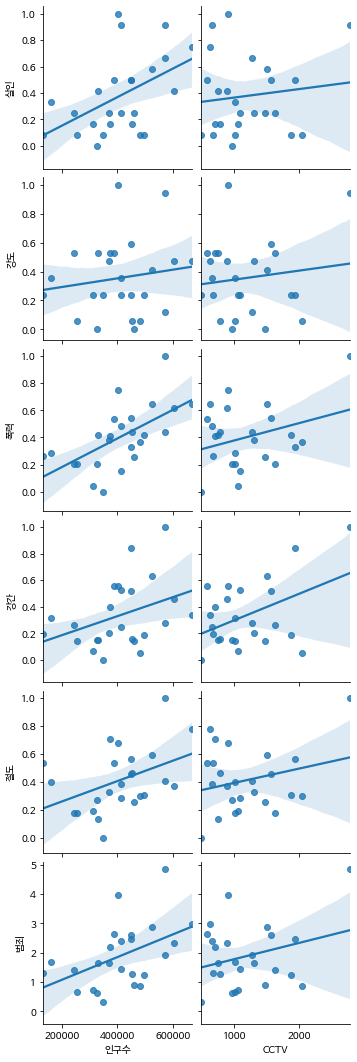

In [41]:
sns.pairplot(
    crime_norm,
    x_vars=["인구수", "CCTV"],
    y_vars=["살인", "강도", "폭력", "강간", "절도", "범죄"],
    kind='reg'
)
plt.show()

* 인구수가 늘어나면 각종 범죄가 늘어납니다.
* CCTV도 늘어나면 각종 범죄가 늘어납니다.
  * 범죄가 일어나서 CCTV를 설치 하는 경향 때문에...?

### 인구수, CCTV 그리고 검거율의 상관관계 보기

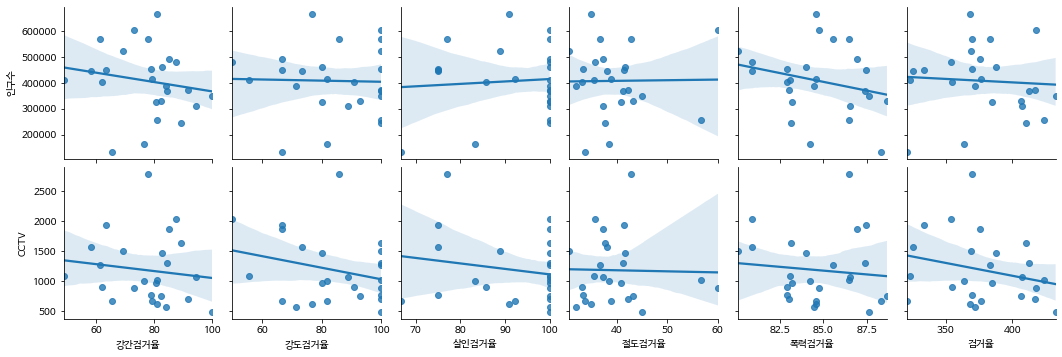

In [42]:
sns.pairplot(
    crime_norm,
    y_vars=["인구수", "CCTV"],
    x_vars=["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율", "검거율"],
    kind='reg'
)

## heatmap을 사용해서 검거율 순으로 정렬

In [43]:
tmp_max = crime_norm["검거율"].max() # 검거의 최대값 가져오기

# 검거율의 최대값을 100으로 설정
crime_norm['검거율'] = crime_norm["검거율"] / tmp_max * 100
crime_norm = crime_norm.sort_values(by='검거율', ascending=False) # 검거값 내림차순으로 정렬
crime_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


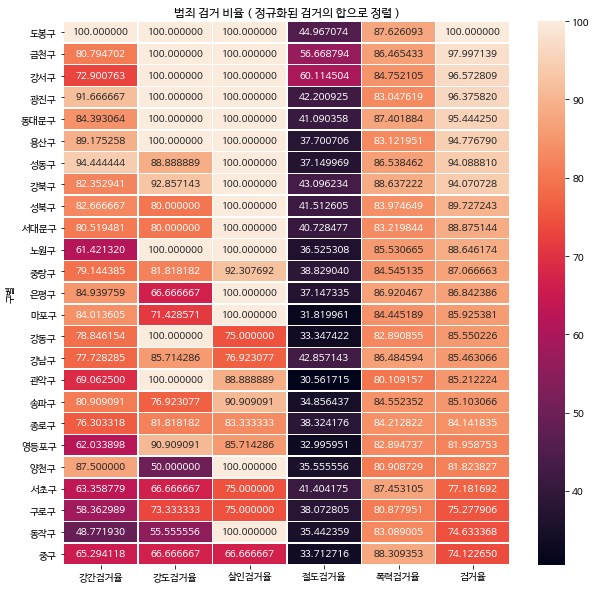

In [44]:
col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율", '검거율']

plt.figure(figsize=(10, 10))
sns.heatmap(
    crime_norm[col],
    annot=True, # 숫자를 히트맵 위에 표시 할지 여부
    fmt='f', # 실수형태로 표시
    linewidths=.5 # 선 굵기
)

plt.title("범죄 검거 비율 ( 정규화된 검거의 합으로 정렬 )")
plt.show()

## 범죄 히트맵 시각화

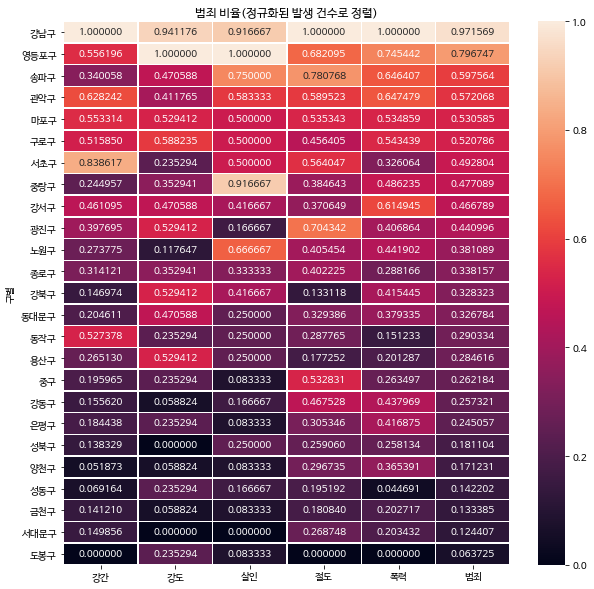

In [45]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_norm['범죄'] = crime_norm['범죄'] / 5
crime_norm = crime_norm.sort_values(by='범죄', ascending=False) # 범죄 내림차순 정렬

plt.figure(figsize=(10, 10))
sns.heatmap(
    crime_norm[target_col],
    annot=True,
    fmt='f',
    linewidths = .5
)
plt.title("범죄 비율(정규화된 발생 건수로 정렬)")
plt.show()